<h1 align="center">Metody numeryczne - projekt II</h1>

<h5 align="center" style="font-style:italic; font-weight:lighter">Adam Walentkowski 171717</h5>

<h2 align="center">SPRAWOZDANIE</h2>

<h3 style="padding-left:2em">Wstęp</h3>

Celem projektu było zapoznanie się z rozwiązaniem układu równań liniowych wielu niewiadomych za pomocą metod iteracyjnych oraz bezpośrednich. Wykorzystano macierz wstęgową w formacie pełnym posiadającą 5 diagonali (szerokość wstęgi równa 5) pełniącą rolę macierzy systemowej. Jest ona kwadratowa: o rozmiarze 917x917, gdzie komórki diagonali głównej mają wartość 12, a komórki pozostałych diagonali wartość -1. <br>Wraz z wektorem o długości 917 komórek niewiadomych tworzy lewą część równania, po drugiej stronie znajduje się tzw. wektor pobudzenia. <br>&nbsp;&nbsp;Ten składa się z wartości którego $n$−ty element ma wartość $sin(n ·(f + 1))$, jest tej samej długości co wektor niewiadomych.

$$ \begin{bmatrix}
    12 & -1 & -1 & 0 & 0 & 0 & 0 & \dots & 0 \\
    -1 & 12 & -1 & -1& 0 & 0 & 0 & \dots & 0 \\
    -1 & -1 & 12 & -1& -1& 0 & 0 & \dots & 0 \\
     0 & -1 & -1 & 12& -1& -1& 0 & \dots & 0 \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & 0 & \dots & 0 & -1  & -1 & 12
\end{bmatrix} 
\begin{bmatrix}
x_1\\x_2\\x_3\\\dots\\\dots\\x_{917}
\end{bmatrix}
=
\begin{bmatrix}
 0.909297\\-0.756802\\-0.279415\\\dots\\\dots\\-0.991779
\end{bmatrix}$$

Dla metod iteracyjnych ważnym elementem algorytmu jest wyliczanie normy euklidesowej (norma 2) wektora residuum: <br><div align="center"> $res^{(k)}=Ax^{(k)} - b$  &nbsp; , gdzie k to numer iteracji.</div>

Wektor residuum informuje nas jak wielki błąd wnosi wektor x w danej iteracji, jeśli norma wektora będzie odpowiednio mała (rzędu 10$^{-9}$) to możemy przyjąć takie rozwiązanie jako "prawidłowe" i algorytm się zatrzymuje.

<h3 style="padding-left:2em">Obserwacje</h3>

Po implementacji metody Jacobiego oraz metody Gaussa-Seidela - czyli metod iteracyjnych do rozwiązywania takich układów równań, zostały one porównane pod względem szybkości oraz ilości iteracji jakiej potrzebują do osiągnięcia normy residuum mniejszej bądź równej 10$^{-9}$.

In [134]:
from IPython.display import HTML, display
import tabulate
table = [["Method:","Jacobi","Gauss-Seidel"],
["Iteration no.: 1", "norm: 80.7734","norm: 48.4572"],
["Iteration no.: 2", "norm: 26.8796","norm: 9.67629"],
["Iteration no.: 3", "norm: 8.95201","norm: 1.93349"],
["Iteration no.: 4", "norm: 2.98219","norm: 0.386388"],
["Iteration no.: 5", "norm: 0.993571","norm: 0.0772193"],
["Iteration no.: 6", "norm: 0.331047","norm: 0.0154324"],
["Iteration no.: 7", "norm: 0.110305","norm: 0.00308423"],
["Iteration no.: 8", "norm: 0.036755","norm: 0.000616399"],
["Iteration no.: 9", "norm: 0.0122475","norm: 0.000123191"],
["Iteration no.: 10", "norm: 0.00408117","norm: 2.46205e-05"],
["Iteration no.: 11", "norm: 0.00135997","norm: 4.92058e-06"],
["Iteration no.: 12", "norm: 0.000453191","norm: 9.83414e-07"],
["Iteration no.: 13", "norm: 0.000151021","norm: 1.96543e-07"],
["Iteration no.: 14", "norm: 5.03268e-05","norm: 3.92806e-08"],
["Iteration no.: 15", "norm: 1.67712e-05","norm: 7.85055e-09"],
["Iteration no.: 16", "norm: 5.58899e-06","norm: 1.569e-09"],
["Iteration no.: 17", "norm: 1.86254e-06","norm: 3.13577e-10"],
["Iteration no.: 18", "norm: 6.20699e-07",""],
["Iteration no.: 19", "norm: 2.06852e-07",""],
["Iteration no.: 20", "norm: 6.8935e-08",""],
["Iteration no.: 21", "norm: 2.29733e-08",""],
["Iteration no.: 22", "norm: 7.65612e-09",""],
["Iteration no.: 23", "norm: 2.5515e-09",""],
["Iteration no.: 24", "norm: 8.50327e-10",""],
["Time:", "1.19038 seconds", "0.303456 seconds"]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Method:,Jacobi,Gauss-Seidel
Iteration no.: 1,norm: 80.7734,norm: 48.4572
Iteration no.: 2,norm: 26.8796,norm: 9.67629
Iteration no.: 3,norm: 8.95201,norm: 1.93349
Iteration no.: 4,norm: 2.98219,norm: 0.386388
Iteration no.: 5,norm: 0.993571,norm: 0.0772193
Iteration no.: 6,norm: 0.331047,norm: 0.0154324
Iteration no.: 7,norm: 0.110305,norm: 0.00308423
Iteration no.: 8,norm: 0.036755,norm: 0.000616399
Iteration no.: 9,norm: 0.0122475,norm: 0.000123191
Iteration no.: 10,norm: 0.00408117,norm: 2.46205e-05


Obie metody wymagają $O(n^2)$ operacji, w obu metodach macierz systemową dzielimy na trzy poszczególne macierze, diagonalną D, trójkątną dolną bez diagonali L i trójkątną górną bez diagonali U. Wynikiem ich sumy jest macierz systemowa. W metodzie Jacobiego do wyliczenia wektora kolejnej iteracji, używamy wektorów z poprzednich iteracji, zaś w metodzie Gaussa-Seidela natychmiastowo używamy do wyliczeń otrzymany wektor.

<h3 style="padding-left:2em">Zbieżność</h3>

By powyższe metody zbiegały się do rozwiązania, muszą być spełnione następujące warunki:<br>
<div style="padding-left:2em">Gauss-Seidel:<br></div>
<div style="padding-left:3em">-macierz $A$ jest symetryczna, dodatnio określona<br>
-$A$ jest diagonalnie dominująca ($|a_{ii}| > \sum_{i \neq j} |a_{ij} |$)<br></div>
<div style="padding-left:2em">Jacobi:<br></div>
<div style="padding-left:3em">-promień spektralny macierzy $D^{−1}(L + U)$ jest mniejszy niż $1$<br>
-$A$ jest diagonalnie dominująca</div>


Zmieniając wartość komórek diagonali głównej z 12 na 3:

$$ \begin{bmatrix}
     3 & -1 & -1 & 0 & 0 & 0 & 0 & \dots & 0 \\
    -1 &  3 & -1 & -1& 0 & 0 & 0 & \dots & 0 \\
    -1 & -1 &  3 & -1& -1& 0 & 0 & \dots & 0 \\
     0 & -1 & -1 &  3& -1& -1& 0 & \dots & 0 \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & 0 & \dots & 0 & -1  & -1 & 3
\end{bmatrix} $$

Macierz przestaje spełniać warunek zbieżności wspólny dla metod Jacobiego i Gaussa-Seidela, ponieważ nie posiada już diagonali dominującej.

<h3 style="padding-left:2em">Faktoryzacja LU</h3>

Faktoryzacja LU to metoda bezpośrednia rozwiązywania układów równań liniowych. Polega na zmianie macierzy systemowej $A$ na iloczyn macierzy trójkątnej dolnej L i trójkątnej górnej U. Następnie:<br>$LUx = b$ &nbsp;&nbsp; $=>$ &nbsp;&nbsp;
$Ux = y$<br>$Ly = b$ &nbsp;&nbsp; rozwiązujemy otrzymując wektor $y$ metodą podstawiania w przód<br>
$Ux = y$ &nbsp;&nbsp; rozwiązujemy otrzymując wektor $x$ metodą podstawiania w tył<br><br>Metoda ta wymaga $O(n^3)$ operacji, co sugeruje, że powinna szukać rozwiązania dłużej niż metody iteracyjne. Natomiast ta metoda zawsze zbiega się do prawidłowego rozwiązania układu równań, dzięki czemu można było ją zastosować do układu równań wykorzystującego powyższą macierz:

<div style="font-style:Italic"> "Computing linear equations with LU Factorization method.
<br> Norm: 5.77682e-13
Time: 0.42522 seconds."</div>

<h3 style="padding-left:2em">Wielkość danych a czas wykonywania</h3>

In [135]:
import matplotlib.pyplot as plt
N = [100,500,1000,2000,3000]
def draw_plot(sub_index, xtick_range = 0, tick_step = 1,\
            xname = None, yname = None, **plots):
    plt.figure(figsize = (12,6), dpi = 100)
    plt.subplot(2, 1, sub_index)
    plt.grid(color = 'gray', linestyle = '-', linewidth = 0.5)
    if xtick_range != 0:
        plt.xticks(nmp.arange(0, xtick_range + 1, step = tick_step))
        for name, plot in plots.items():
            ax1 = plt.axes()
            plt.plot(plot, label = name)
            plt.yscale("log", basey=2)
    else:
        for name, plot in plots.items():
            plt.plot(N, plot, label = name)
    plt.legend(loc = 'upper right', frameon = False)
    plt.ylabel(yname)
    plt.xlabel(xname)
    if sub_index == 2:
        plt.show

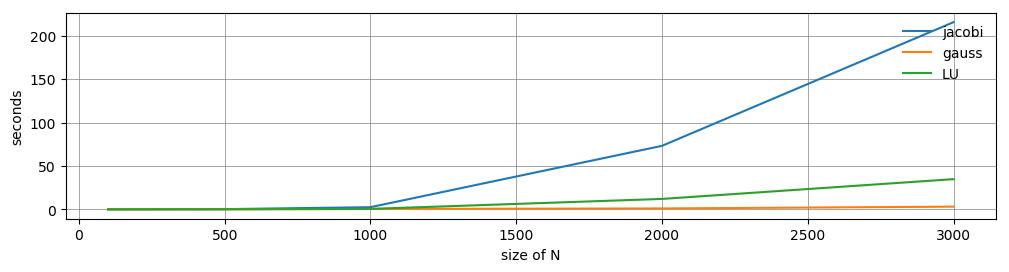

In [136]:
import numpy as nmp
import pandas as pd

jacobi_time = [0.0146508, 0.262402, 2.50435, 73.1712, 215.649]
gauss_time = [0.0261716, 0.0985341, 0.47507, 1.06268, 3.1099]
lu_time = [0.0020647, 0.0758143, 0.542979, 12.0178, 34.7999]
draw_plot(1, xname = "size of N", yname = "seconds", jacobi = jacobi_time,\
          gauss = gauss_time, LU = lu_time)

### N = 100

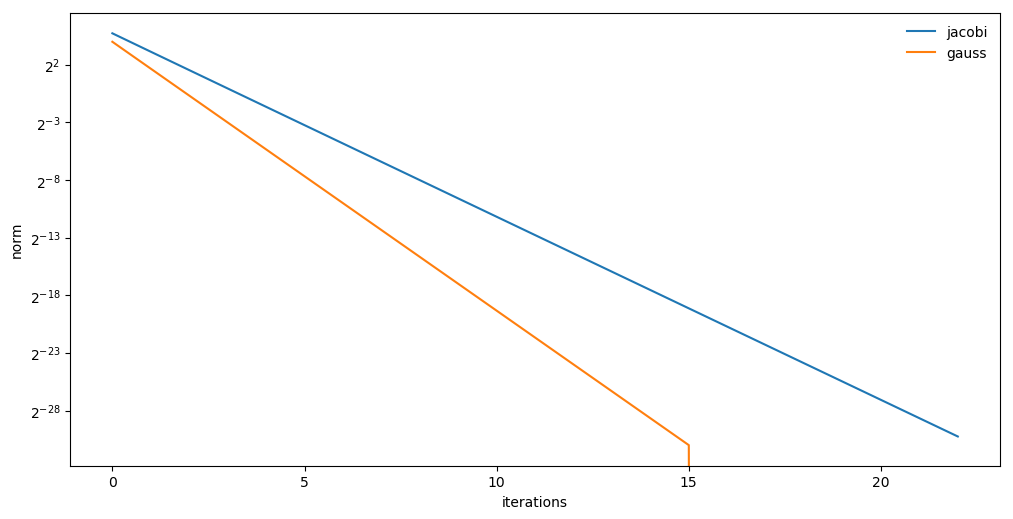

In [137]:
Nsize = pd.read_csv('N100.csv', names=['Jacobi', 'Gauss'])
jacobi_temp = Nsize['Jacobi'].values
jacobi_norms = jacobi_temp.astype(float)
gauss_temp = Nsize['Gauss'].values
gauss_norms = gauss_temp.astype(float)
draw_plot(2, jacobi_norms.size, xname = "iterations", yname = "norm", jacobi = jacobi_norms,\
          gauss = gauss_norms)

### N = 500

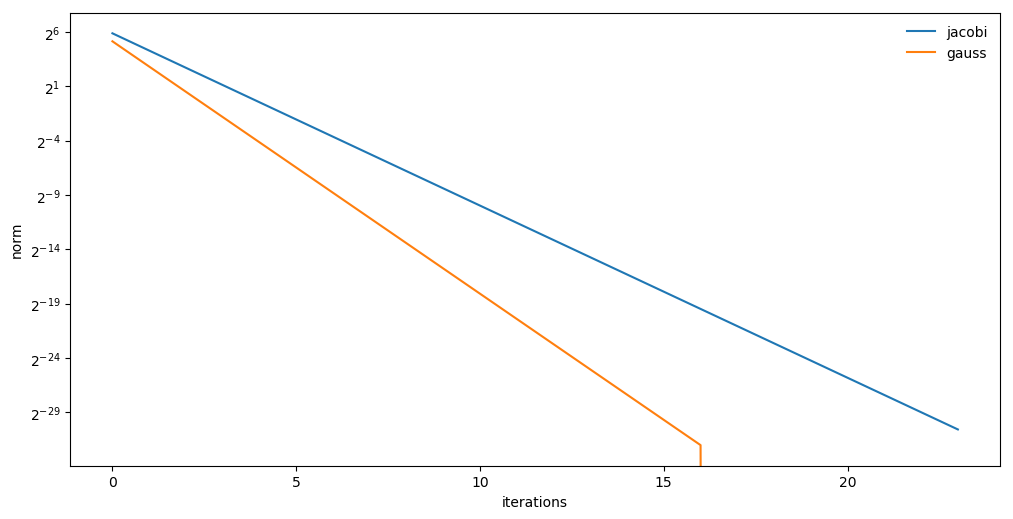

In [138]:
Nsize = pd.read_csv('N500.csv', names=['Jacobi', 'Gauss'])
jacobi_temp = Nsize['Jacobi'].values
jacobi_norms = jacobi_temp.astype(float)
gauss_temp = Nsize['Gauss'].values
gauss_norms = gauss_temp.astype(float)
draw_plot(1, jacobi_norms.size, xname = "iterations", yname = "norm", jacobi = jacobi_norms,\
          gauss = gauss_norms)

### N = 1000

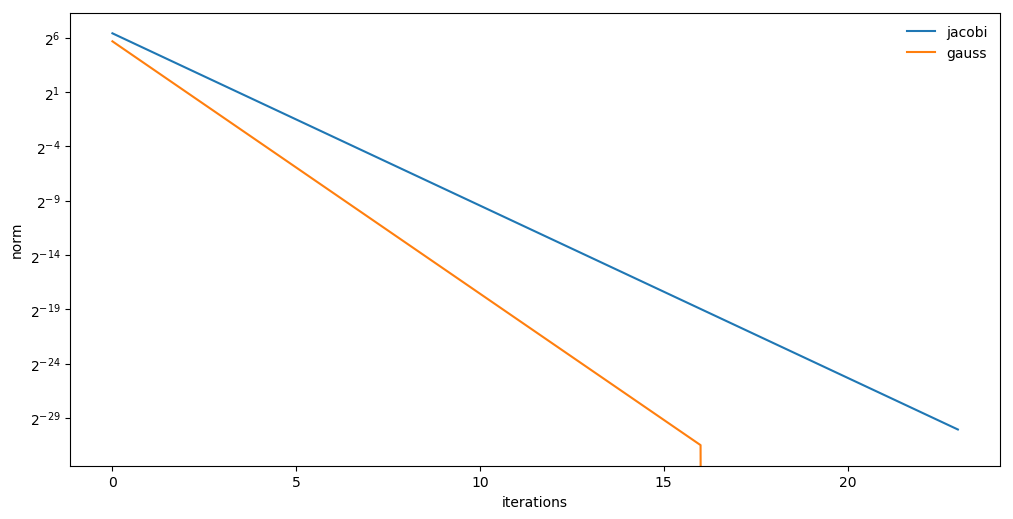

In [139]:
Nsize = pd.read_csv('N1000.csv', names=['Jacobi', 'Gauss'])
jacobi_temp = Nsize['Jacobi'].values
jacobi_norms = jacobi_temp.astype(float)
gauss_temp = Nsize['Gauss'].values
gauss_norms = gauss_temp.astype(float)
draw_plot(1, jacobi_norms.size, xname = "iterations", yname = "norm", jacobi = jacobi_norms,\
          gauss = gauss_norms)

### N = 2000

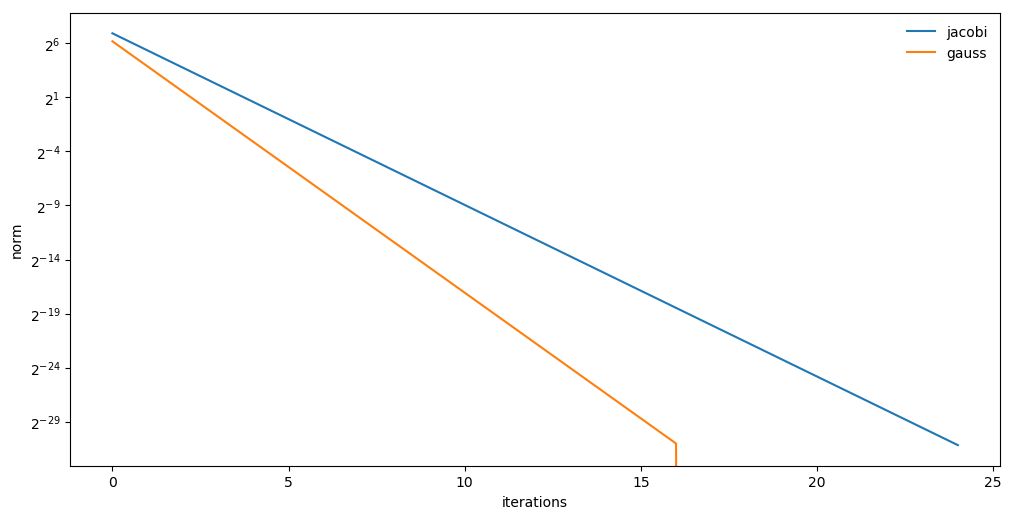

In [140]:
Nsize = pd.read_csv('N2000.csv', names=['Jacobi', 'Gauss'])
jacobi_temp = Nsize['Jacobi'].values
jacobi_norms = jacobi_temp.astype(float)
gauss_temp = Nsize['Gauss'].values
gauss_norms = gauss_temp.astype(float)
draw_plot(1, jacobi_norms.size, xname = "iterations", yname = "norm", jacobi = jacobi_norms,\
          gauss = gauss_norms)

### N = 3000

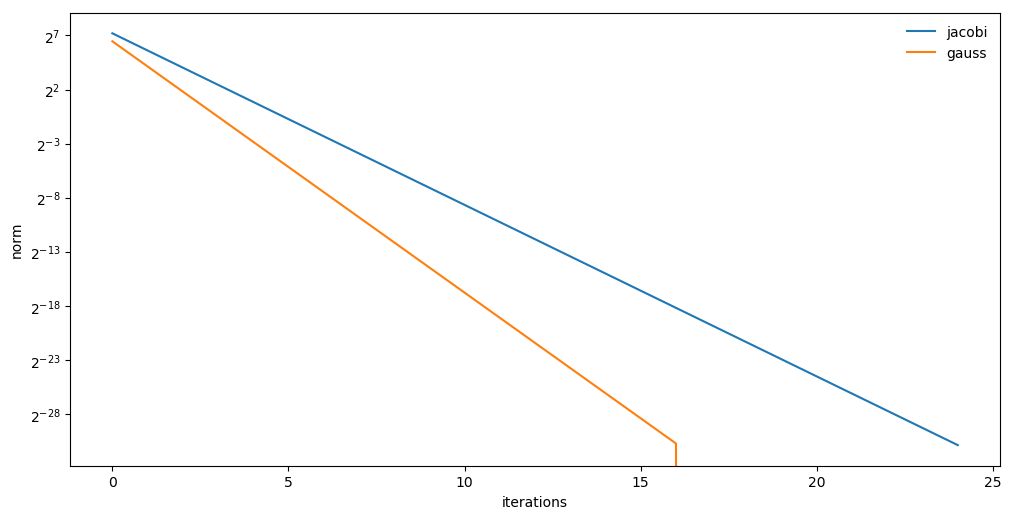

In [141]:
Nsize = pd.read_csv('N3000.csv', names=['Jacobi', 'Gauss'])
jacobi_temp = Nsize['Jacobi'].values
jacobi_norms = jacobi_temp.astype(float)
gauss_temp = Nsize['Gauss'].values
gauss_norms = gauss_temp.astype(float)
draw_plot(1, jacobi_norms.size, xname = "iterations", yname = "norm", jacobi = jacobi_norms,\
          gauss = gauss_norms)

<h3 style="padding-left:2em">Wnioski</h3>

Prawdopodobnym wydaje się być nie do końca poprawna implementacja metody iteracyjnej, ponieważ największą część czasu poświęca ona na obliczenie iloczynu macierzy $-D^{-1}(L + U)$. Jest to jednak operacja wymagająca $O(n^3) operacji dla macierzy kwadratowej. Niemniej jednak można zauważyć, że ilość iteracji nawet dla o wiele większych N nie zmienia się drastycznie.